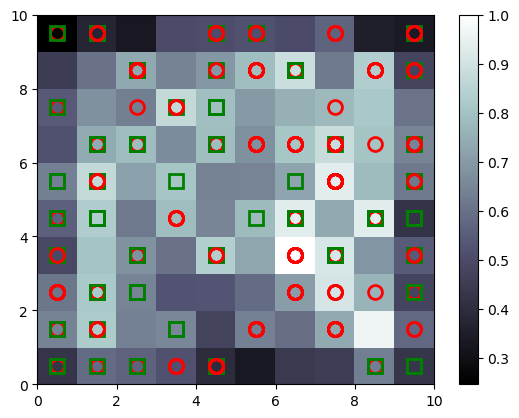

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('datasets/Part 4 - Self Organizing Maps (SOM)/Credit_Card_Applications.csv')

# Separate ID and features
customer_ids = dataset.iloc[:, 0].values  # Assuming first column is ID
X_features = dataset.iloc[:, 1:-1].values  # Exclude ID and target
y = dataset.iloc[:, -1].values

# Scale only the features (not the ID)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X_features)

# Combine ID with scaled features for SOM training
# But actually, we should only use features for SOM
X_for_som = X_scaled

from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=X_for_som.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_for_som)
som.train_random(data=X_for_som, num_iteration=100)

# Plotting code remains similar but use X_for_som
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X_for_som):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()